## 1 Decition Tree - DT

In [33]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [34]:
iris_data=load_iris()
iris_data.data.shape
data_df=pd.DataFrame(iris_data.data,columns=[iris_data.feature_names])
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
#Extracting data attributes
X = iris_data.data
### Extracting target/ class labels
y = iris_data.target

### Divide the original dataset into two subsets: one for training (80%) and one for testing (20%).

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)
print("Shape of input - training set", X_train.shape)
print("Shape of output - training set", y_train.shape)
print("Shape of input - testing set", X_test.shape)
print("Shape of output - testing set", y_test.shape)

Shape of input - training set (120, 4)
Shape of output - training set (120,)
Shape of input - testing set (30, 4)
Shape of output - testing set (30,)


### Build a DT for the training subset and test the built model for data from the testing subset

In [37]:
from sklearn.tree import DecisionTreeClassifier
iris_dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=50)
iris_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [38]:
#Predicting labels on the test set.
y_predict =  iris_dt.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,mean_squared_error
print('Accuracy score on train data: ', accuracy_score(y_true=y_train, y_pred=iris_dt.predict(X_train)))
print('Accuracy score on test data: ', accuracy_score(y_true=y_test, y_pred=y_predict))


Accuracy score on train data:  0.9583333333333334
Accuracy score on test data:  0.9666666666666667


In [40]:
from sklearn.metrics import confusion_matrix 
y_pred_train=iris_dt.predict(X_train)
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_predict))

print('MSE- train dataset:\n', mean_squared_error(y_train,y_pred_train))
print('MSE- test dataset:\n', mean_squared_error(y_test,y_predict))

Confusion Matrix - Train: 
 [[39  0  0]
 [ 0 36  1]
 [ 0  4 40]]

 Confusion Matrix - Test: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
MSE- train dataset:
 0.041666666666666664
MSE- test dataset:
 0.03333333333333333


[Text(133.92000000000002, 181.2, 'X[2] <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]')]

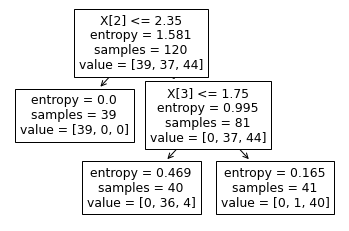

In [41]:
from sklearn import tree
tree.plot_tree(iris_dt) 

#### Testing The Model on Test data

In [42]:
predicted_TestData= pd.DataFrame(y_predict, columns=['Predicted'])
Actual_TestData= pd.DataFrame(y_test, columns=['target'])
Actual_TestData = Actual_TestData.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([Actual_TestData,predicted_TestData],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
target,2,1,0,2,0,2,0,1,1,1,...,2,1,0,0,2,0,0,1,1,0
Predicted,2,1,0,2,0,2,0,1,1,1,...,2,1,0,0,2,0,0,1,1,0


In [43]:
# Check the model score using test data
iris_dt.score(X_test, y_test)


0.9666666666666667

## 2 Random Forests

In [44]:
Seed_data=pd.read_csv('./seeds_dataset.csv')

In [45]:
Seed_data.head()

,area,perimeter,compactness,lengthofkernel,widthofkernel,asymmetrycoefficient,lengthofkernelgroove,selector
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [46]:
X_seed=Seed_data.iloc[:,:7]
X_seed


,area,perimeter,compactness,lengthofkernel,widthofkernel,asymmetrycoefficient,lengthofkernelgroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [47]:
from sklearn.preprocessing import LabelEncoder
y=Seed_data['selector'].values
leb = LabelEncoder()
y_seed = leb.fit_transform(y)
y_seed


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### Using cross-validation k=100

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [49]:
X_train_seed, X_test_seed, y_train_seed, y_test_seed = train_test_split(X_seed, y_seed, test_size=0.20)
# creating list of K for KNN
# list_neighbors = list(range(1,100,10))
# creating list of cv scores
cross_scores = []
# perform 100-fold cross validation
# for k in list_neighbors:
knn = KNeighborsClassifier(n_neighbors=100)
scores = cross_val_score(knn, X_train_seed, y_train_seed, cv=10, scoring='accuracy')
cross_scores.append(scores.mean())


C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\ADMIN\AppData\Local

In [50]:
cross_scores

[0.9099264705882353]

#### Build a DT for seed training set

In [51]:
from sklearn.tree import DecisionTreeClassifier
seed_dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=50)
seed_dt.fit(X_train_seed,y_train_seed)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [52]:
#Predicting labels on the test set.
y_predict_seed =  seed_dt.predict(X_test_seed)
#Predicting labels on the train set.
y_predict_seed_train=seed_dt.predict(X_train_seed)

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data: ', accuracy_score(y_true=y_train_seed, y_pred=y_predict_seed_train))
print('Accuracy score on test data: ', accuracy_score(y_true=y_test_seed, y_pred=y_predict_seed))

Accuracy score on train data:  0.9523809523809523
Accuracy score on test data:  0.8809523809523809


In [54]:
from sklearn.metrics import confusion_matrix 
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train_seed,y_predict_seed_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test_seed,y_predict_seed))

Confusion Matrix - Train: 
 [[52  1  2]
 [ 1 54  0]
 [ 4  0 54]]

 Confusion Matrix - Test: 
 [[12  0  3]
 [ 1 14  0]
 [ 1  0 11]]


[Text(186.0, 195.696, 'X[6] <= 5.576\nentropy = 1.585\nsamples = 168\nvalue = [55, 55, 58]'),
 Text(111.60000000000001, 152.208, 'X[0] <= 13.41\nentropy = 1.063\nsamples = 113\nvalue = [54, 1, 58]'),
 Text(74.4, 108.72, 'X[5] <= 2.891\nentropy = 0.569\nsamples = 67\nvalue = [9, 0, 58]'),
 Text(37.2, 65.232, 'entropy = 0.946\nsamples = 11\nvalue = [7, 0, 4]'),
 Text(111.60000000000001, 65.232, 'X[4] <= 3.038\nentropy = 0.222\nsamples = 56\nvalue = [2, 0, 54]'),
 Text(74.4, 21.744, 'entropy = 0.0\nsamples = 48\nvalue = [0, 0, 48]'),
 Text(148.8, 21.744, 'entropy = 0.811\nsamples = 8\nvalue = [2, 0, 6]'),
 Text(148.8, 108.72, 'entropy = 0.151\nsamples = 46\nvalue = [45, 1, 0]'),
 Text(260.40000000000003, 152.208, 'X[5] <= 2.054\nentropy = 0.131\nsamples = 55\nvalue = [1, 54, 0]'),
 Text(223.20000000000002, 108.72, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(297.6, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50, 0]')]

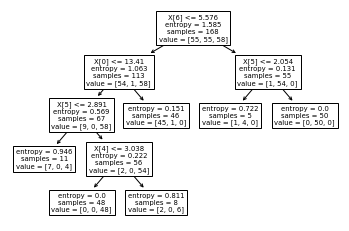

In [55]:
from sklearn import tree
tree.plot_tree(seed_dt) 

####  Classify data from the testing set using one DT 

In [56]:
predicted_TestData= pd.DataFrame(y_predict_seed, columns=['Predicted'])
Actual_TestData= pd.DataFrame(y_test_seed, columns=['target'])
Actual_TestData = Actual_TestData.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
actual_vs_predicted = pd.concat([Actual_TestData,predicted_TestData],axis =1)
actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
target,0,1,0,2,2,0,1,0,1,0,...,2,0,1,1,1,1,0,2,2,0
Predicted,0,1,0,2,2,0,1,0,1,0,...,0,2,1,1,1,1,0,2,2,0


In [57]:
# Check the model score(accuracy) using test data
seed_dt.score(X_test_seed, y_test_seed)

0.8809523809523809

####  Classify data from the testing set using one DTs

In [58]:
from sklearn.ensemble import RandomForestClassifier
X_train_seed_dts, X_test_seed_dts, y_train_seed_dts, y_test_seed_dts = train_test_split(X_seed, y_seed, test_size=0.20)

In [59]:
seed_DTs = RandomForestClassifier(random_state=1)
seed_DTs.fit(X_train_seed_dts, y_train_seed_dts)

RandomForestClassifier(random_state=1)

In [60]:
#Predicting labels on the test set.
y_predict_seed_dts =  seed_DTs.predict(X_test_seed_dts)
#Predicting labels on the train set.
y_predict_seed_train_dts=seed_DTs.predict(X_train_seed_dts)

In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data: ', accuracy_score(y_true=y_train_seed_dts, y_pred=y_predict_seed_train_dts))
print('Accuracy score on test data: ', accuracy_score(y_true=y_test_seed_dts, y_pred=y_predict_seed_dts))

Accuracy score on train data:  1.0
Accuracy score on test data:  0.8809523809523809


In [62]:
from sklearn.metrics import confusion_matrix 
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train_seed_dts,y_predict_seed_train_dts))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test_seed_dts,y_predict_seed_dts))

Confusion Matrix - Train: 
 [[59  0  0]
 [ 0 55  0]
 [ 0  0 54]]

 Confusion Matrix - Test: 
 [[ 8  0  3]
 [ 1 14  0]
 [ 1  0 15]]


In [63]:
predicted_TestData= pd.DataFrame(y_predict_seed_dts, columns=['Predicted'])
Actual_TestData= pd.DataFrame(y_test_seed_dts, columns=['target'])
Actual_TestData = Actual_TestData.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
actual_vs_predicted = pd.concat([Actual_TestData,predicted_TestData],axis =1)
actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
target,2,1,1,1,2,0,2,2,1,0,...,0,1,2,2,2,1,1,0,1,2
Predicted,2,1,1,1,2,0,0,2,1,0,...,0,1,2,2,2,1,1,2,1,2


In [64]:
# Check the model score(accuracy) using test data
seed_DTs.score(X_test_seed_dts, y_test_seed_dts)

0.8809523809523809